In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np


In [2]:
problem={
    "num_vars":3,
    "names":["x1","x2","x3"],
    'bounds':[[-3.14159265359, 3.14159265359],
              [-3.14159265359, 3.14159265359],
              [-3.14159265359, 3.14159265359]]
}

In [3]:
param_values = saltelli.sample(problem,1024)


C:\Users\Violet\AppData\Local\Temp\ipykernel_22996\3416248122.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem,1024)


In [4]:
param_values

array([[-3.13238877, -0.77619428, -0.32827189],
       [-0.08283496, -0.77619428, -0.32827189],
       [-3.13238877,  0.3589515 , -0.32827189],
       ...,
       [-0.93572828,  0.80073797,  0.99095159],
       [-0.93572828,  0.81914574,  2.70901007],
       [-0.93572828,  0.81914574,  0.99095159]])

In [5]:
param_values.shape


(8192, 3)

In [6]:
Y = Ishigami.evaluate(param_values)
Y


array([ 3.426362  ,  3.3527401 ,  0.85463176, ...,  2.72470174,
       -1.40463805,  2.85339365])

In [7]:
Si = sobol.analyze(problem,Y,print_to_console=True)


          ST   ST_conf
x1  0.555860  0.085838
x2  0.441898  0.038431
x3  0.244675  0.030883
          S1   S1_conf
x1  0.316832  0.054704
x2  0.443763  0.047164
x3  0.012203  0.053201
                S2   S2_conf
(x1, x2)  0.009254  0.086782
(x1, x3)  0.238172  0.100714
(x2, x3) -0.004888  0.060008


Si是一个字典，关键词有"S1", “S2”, “ST”, “S1_conf”, “S2_conf”, and “ST_conf”。_conf存储相应的置信区间，置信水平在95%。可以使用print_to_console=True 打印所有的指数，或者直接取键值。

In [8]:
Si

{'S1': array([0.31683154, 0.44376306, 0.01220312]),
 'S1_conf': array([0.05470361, 0.04716351, 0.05320124]),
 'ST': array([0.55586009, 0.44189807, 0.24467539]),
 'ST_conf': array([0.08583825, 0.03843094, 0.03088315]),
 'S2': array([[        nan,  0.00925429,  0.23817211],
        [        nan,         nan, -0.0048877 ],
        [        nan,         nan,         nan]]),
 'S2_conf': array([[       nan, 0.08678206, 0.10071353],
        [       nan,        nan, 0.06000777],
        [       nan,        nan,        nan]])}

In [9]:
print('x1-x2:',Si['S2'][0,1])
print('x1-x3:',Si['S2'][0,2])
print('x2-x3:',Si['S2'][1,2])


x1-x2: 0.009254293034908101
x1-x3: 0.23817210956856472
x2-x3: -0.004887704633467337


In [10]:
total_si,first_si,second_si = Si.to_df()
second_si


,S2,S2_conf
"(x1, x2)",0.009254,0.086782
"(x1, x3)",0.238172,0.100714
"(x2, x3)",-0.004888,0.060008


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

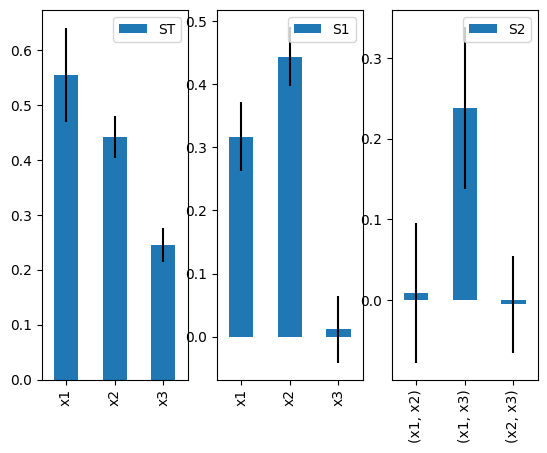

In [11]:
Si.plot()


# ==========

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol


In [13]:
def parabola(x,a,b):
    return a + b*x**2


In [14]:
problem = {
    'num_vars':2,
    'names':['a','b'],
    'bounds':[[0,1]]*2
}


In [15]:
param_values = saltelli.sample(problem,2**6)
print(param_values.shape)


(384, 2)


C:\Users\Violet\AppData\Local\Temp\ipykernel_22996\3787199837.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem,2**6)


In [16]:
x = np.linspace(-1,1,100)
y = np.array([parabola(x,*params) for params in param_values])


In [17]:
sobol_indices = [sobol.analyze(problem,Y) for Y in y.T]
sobol_indices[0]


{'S1': array([0.49526584, 0.49526584]),
 'S1_conf': array([0.19860346, 0.19984459]),
 'ST': array([0.49745084, 0.49672251]),
 'ST_conf': array([0.17686834, 0.16314996]),
 'S2': array([[       nan, 0.00436999],
        [       nan,        nan]]),
 'S2_conf': array([[       nan, 0.41217735],
        [       nan,        nan]])}

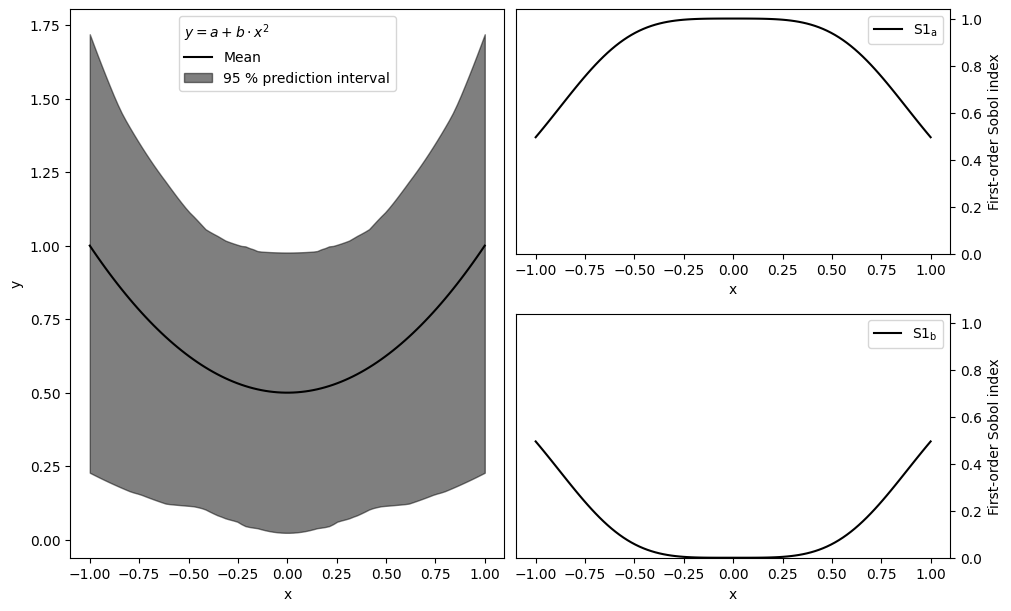

In [18]:
# 提取100个a,b一阶指数
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10,6),constrained_layout = True)
gs = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

for i,ax in enumerate([ax1,ax2]):
    ax.plot(x,S1s[:,i],
           label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
           color = 'black')
    ax.set_xlabel('x')
    ax.set_ylabel('First-order Sobol index')
    ax.set_ylim(0,1.04)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.legend(loc='upper right')
    
ax0.plot(x,np.mean(y,axis=0),label="Mean", color='black')
prediction_interval = 95
ax0.fill_between(x,
                 np.percentile(y, 50 - prediction_interval/2., axis=0),
                 np.percentile(y, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='black',
                 label=f"{prediction_interval} % prediction interval")
ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.legend(title=r"$y=a+b\cdot x^2$",
           loc='upper center')._legend_box.align = "left"

plt.show()
